In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from utils.paths import DATA_RAW_DIR, DATA_PROCESSED_DIR

In [18]:
path_partidos = str(DATA_RAW_DIR / 'partidos_cebollitas.csv')

print('Path:', path_partidos)
print('Does path exist?', Path(path_partidos).exists())

Path: /Users/jssdev/Dev/Learning/Platzi/platzi-machine-learning/data/raw/partidos_cebollitas.csv
Does path exist? True


In [19]:
df_partidos = pd.read_csv(path_partidos, sep=',', encoding='utf-8')
df_partidos.head()

,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena
1,2023-01-08,NumPy City,Atlético Python,1,5,60,40,12,3,Estadio ML
2,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena
3,2023-01-22,Atlético Python,Data United,2,3,57,43,3,3,Campo Pandas
4,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML


In [20]:
df_partidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   fecha_partido           100 non-null    object
 1   equipo_local            100 non-null    object
 2   equipo_visitante        100 non-null    object
 3   goles_local             100 non-null    int64 
 4   goles_visitante         100 non-null    int64 
 5   posesion_local (%)      100 non-null    int64 
 6   posesion_visitante (%)  100 non-null    int64 
 7   tiros_arco_local        100 non-null    int64 
 8   tiros_arco_visitante    100 non-null    int64 
 9   estadio                 100 non-null    object
dtypes: int64(6), object(4)
memory usage: 7.9+ KB


In [21]:
df_partidos['fecha_partido'] = pd.to_datetime(
    df_partidos['fecha_partido'], format=r'%Y-%m-%d', errors='coerce')



df_partidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   fecha_partido           100 non-null    datetime64[ns]
 1   equipo_local            100 non-null    object        
 2   equipo_visitante        100 non-null    object        
 3   goles_local             100 non-null    int64         
 4   goles_visitante         100 non-null    int64         
 5   posesion_local (%)      100 non-null    int64         
 6   posesion_visitante (%)  100 non-null    int64         
 7   tiros_arco_local        100 non-null    int64         
 8   tiros_arco_visitante    100 non-null    int64         
 9   estadio                 100 non-null    object        
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 7.9+ KB


In [22]:
df_partidos['estadio'].unique()

array(['Python Arena', 'Estadio ML', 'Campo Pandas', 'Estadio DataCamp'],
      dtype=object)

In [23]:
df_partidos['estadio'].nunique()

4

In [24]:
df_partidos['estadio'] = df_partidos['estadio'].astype('category')

In [25]:
df_partidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   fecha_partido           100 non-null    datetime64[ns]
 1   equipo_local            100 non-null    object        
 2   equipo_visitante        100 non-null    object        
 3   goles_local             100 non-null    int64         
 4   goles_visitante         100 non-null    int64         
 5   posesion_local (%)      100 non-null    int64         
 6   posesion_visitante (%)  100 non-null    int64         
 7   tiros_arco_local        100 non-null    int64         
 8   tiros_arco_visitante    100 non-null    int64         
 9   estadio                 100 non-null    category      
dtypes: category(1), datetime64[ns](1), int64(6), object(2)
memory usage: 7.5+ KB


In [26]:
# Estadísticas descriptivas generales
df_partidos.describe(include=['int64'])

,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2.63000,2.540000,50.250000,49.750000,7.580000,7.870000
std,1.58691,1.788967,6.035878,6.035878,2.899599,2.966667
min,0.00000,0.000000,40.000000,40.000000,3.000000,3.000000
25%,1.00000,1.000000,45.000000,44.750000,5.000000,5.000000
50%,3.00000,3.000000,51.000000,49.000000,7.500000,8.000000
75%,4.00000,4.000000,55.250000,55.000000,10.000000,11.000000
max,5.00000,5.000000,60.000000,60.000000,12.000000,12.000000


In [30]:
promedio_goles_local_cebollitas = df_partidos[df_partidos['equipo_local'] ==
                                    'Cebollitas FC']['goles_local'].mean()
promedio_goles_local_cebollitas

np.float64(2.230769230769231)

In [31]:
promedio_goles_visitante_cebollitas = df_partidos[df_partidos['equipo_visitante'] ==
                                    'Cebollitas FC']['goles_visitante'].mean()
promedio_goles_visitante_cebollitas

np.float64(2.611111111111111)

### Histogramas

In [36]:
df_partidos['goles_local']

0     2
1     1
2     1
3     2
4     5
     ..
95    4
96    4
97    5
98    2
99    2
Name: goles_local, Length: 100, dtype: int64

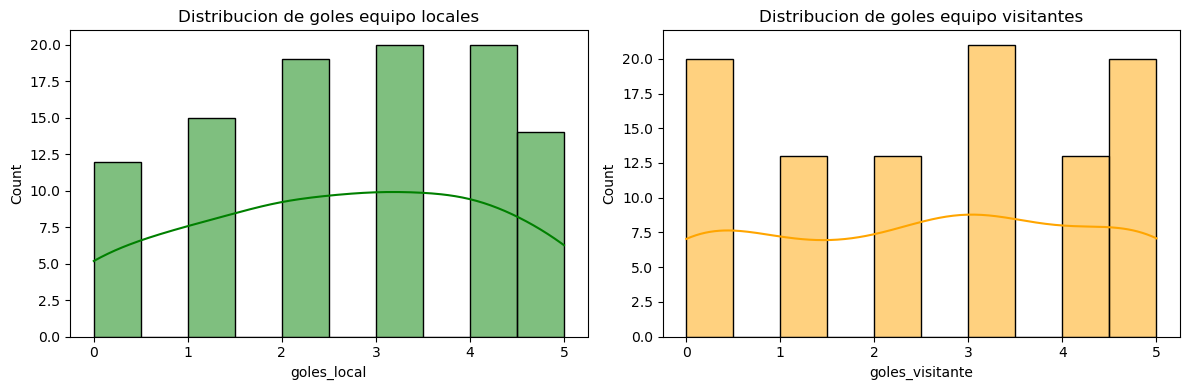

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.histplot(x=df_partidos['goles_local'], kde=True, ax=ax[0], bins=10, color='green')
ax[0].set_title('Distribucion de goles equipo locales')

sns.histplot(x=df_partidos['goles_visitante'], kde=True, ax=ax[1], bins=10, color='orange')
ax[1].set_title('Distribucion de goles equipo visitantes')

plt.tight_layout()
plt.show()

### boxplot

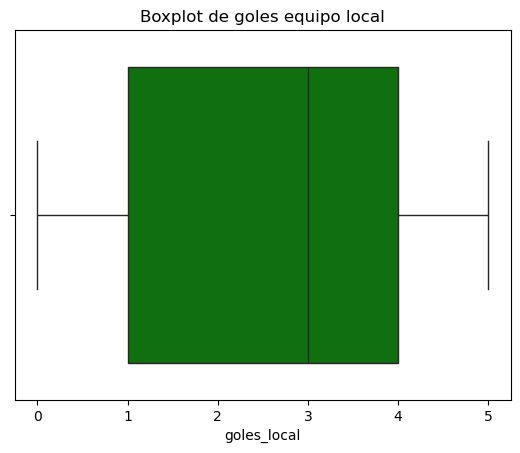

In [45]:
sns.boxplot(x=df_partidos['goles_local'], color='green')
plt.title('Boxplot de goles equipo local')
plt.show()

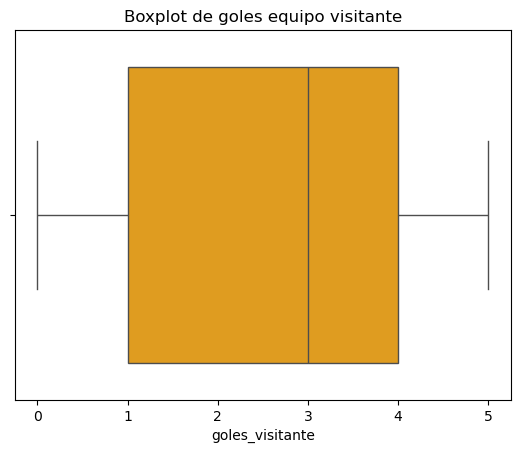

In [46]:
sns.boxplot(x=df_partidos['goles_visitante'], color='orange')
plt.title('Boxplot de goles equipo visitante')
plt.show()

### scatterplot

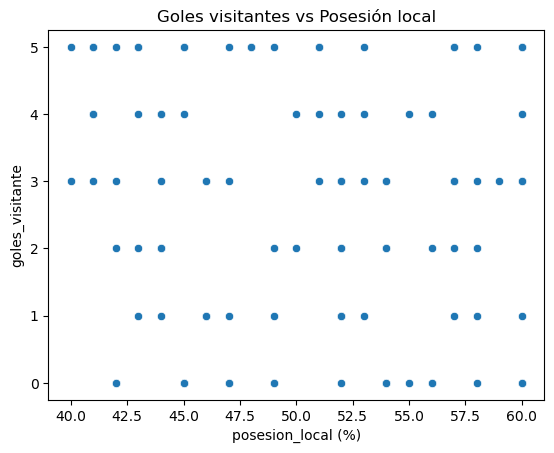

In [49]:
sns.scatterplot(x='posesion_local (%)',
                y='goles_visitante',
                data=df_partidos)

plt.title('Goles visitantes vs Posesión local')

plt.show()

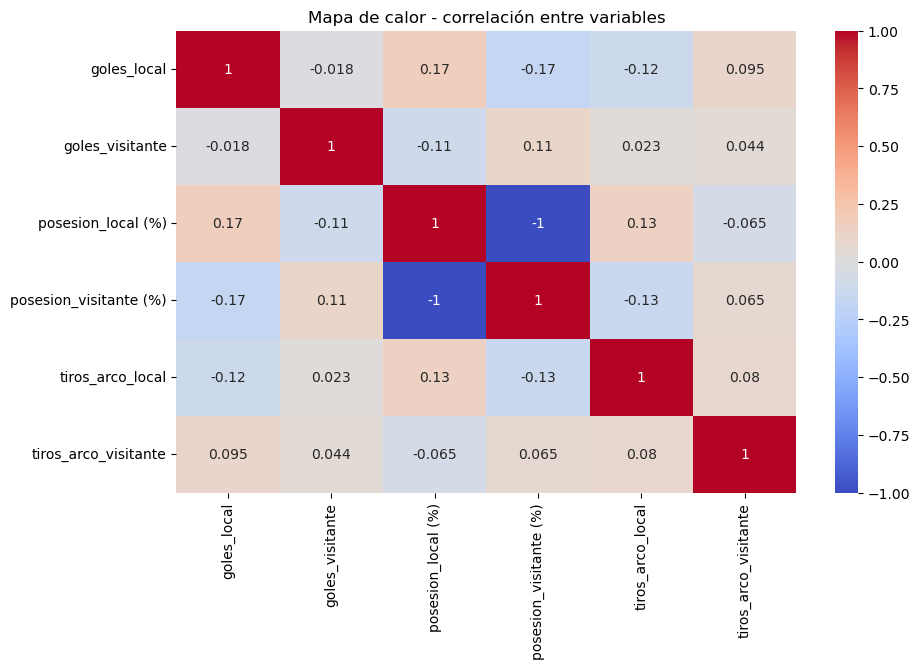

In [50]:
# Mapa de calor para correlación entre variables clave
plt.figure(figsize=(10,6))
sns.heatmap(df_partidos[['goles_local', 'goles_visitante', 'posesion_local (%)', 
                         'posesion_visitante (%)', 'tiros_arco_local', 
                         'tiros_arco_visitante']].corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor - correlación entre variables')
plt.show()